In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.layers import Bidirectional
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\\Dataset\\Data Set\\training.csv')
df.columns = ['Text','Label']

In [3]:
df

,Text,Label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [4]:
df['Label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: Label, dtype: int64

In [5]:
print(df['Label'].dtype)

int64


In [6]:
from preprocess import preprocess_text

In [7]:
df['Text'] = df['Text'].apply(preprocess_text)

In [8]:
df

,Text,Label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting table subb...,0
15997,feel strong good overall,1
15998,feel like rude comment im glad,3


In [9]:
test_df = pd.read_csv('E:\\Dataset\\Data Set\\test.csv')
test_df.columns = ['Text','Label']

In [10]:
test_df

,Text,Label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [11]:
test_df['Text'] = test_df['Text'].apply(preprocess_text)

In [12]:
test_df

,Text,Label
0,im feeling rather rotten im ambitious right,0
1,im updating blog feel shitty,0
2,never make separate ever want feel like ashamed,0
3,left bouquet red yellow tulip arm feeling slig...,1
4,feeling little vain one,0
...,...,...
1995,keep feeling like someone unkind wrong think g...,3
1996,im feeling little cranky negative doctor appoi...,3
1997,feel useful people give great feeling achievement,1
1998,im feeling comfortable derby feel though start...,1


In [13]:
X_train = df['Text']
y_train = df['Label']
X_test = test_df['Text']
y_test = test_df['Label']

In [14]:
# Tokenize the text data
max_features = 30000  
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_len = 150  # Maximum length of sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')

# Convert labels to one-hot encoding
num_classes = 6  # Number of classes (0 to 5)
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

In [15]:
X_train_padded

array([[  51,    1,  565, ...,    0,    0,    0],
       [  31,    2,  381, ...,    0,    0,    0],
       [   4, 2809,  391, ...,    0,    0,    0],
       ...,
       [   1,  226,   33, ...,    0,    0,    0],
       [   1,    3,  456, ...,    0,    0,    0],
       [   7,   54,    1, ...,    0,    0,    0]])

In [16]:
y_train_one_hot

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [17]:
# Build LSTM model
embedding_dim = 150 
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))) 
model.add(Dense(units=num_classes, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train_padded, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_one_hot))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 203ms/step - accuracy: 0.4939 - loss: 1.2902 - val_accuracy: 0.9020 - val_loss: 0.2839
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 202ms/step - accuracy: 0.9335 - loss: 0.2004 - val_accuracy: 0.9110 - val_loss: 0.2375
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 199ms/step - accuracy: 0.9657 - loss: 0.0930 - val_accuracy: 0.9105 - val_loss: 0.2516
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 201ms/step - accuracy: 0.9792 - loss: 0.0614 - val_accuracy: 0.9075 - val_loss: 0.2635
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.9824 - loss: 0.0503 - val_accuracy: 0.9130 - val_loss: 0.2789
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 99s 198ms/step - accuracy: 0.9861 - loss: 0.0376 - val_accuracy: 0.9065 - val_loss: 0.2837
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.9894 - loss: 0.0268 - val_accuracy: 0.9000 - val_loss: 0.3591
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 99s 197ms/step - accuracy: 0.9907 - los

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8967 - loss: 0.4002
Test Loss: 0.35706958174705505
Test Accuracy: 0.9024999737739563


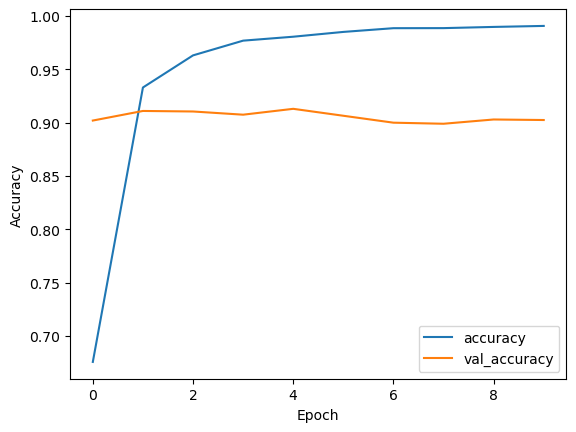

In [20]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# Load validation dataset
validation_df = pd.read_csv('E:\\Dataset\\Data Set\\validation.csv')
validation_df.columns = ['Text','Label']

In [27]:
X_validation = validation_df['Text']

# Tokenize and pad sequences for the validation data
X_validation_sequences = tokenizer.texts_to_sequences(X_validation)
X_validation_padded = pad_sequences(X_validation_sequences, maxlen=max_len, padding='post')

# Make predictions using the trained model
validation_preds = model.predict(X_validation_padded)

predicted_labels = [np.argmax(pred) for pred in validation_preds]
validation_df['Predicted_Label'] = predicted_labels
validation_df
validation_df.head(20)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


,Text,Label,Predicted_Label
0,im feeling quite sad and sorry for myself but ...,0,0
1,i feel like i am still looking at a blank canv...,0,0
2,i feel like a faithful servant,2,1
3,i am just feeling cranky and blue,3,3
4,i can have for a treat or if i am feeling festive,1,1
5,i start to feel more appreciative of what god ...,1,1
6,i am feeling more confident that we will be ab...,1,1
7,i feel incredibly lucky just to be able to tal...,1,1
8,i feel less keen about the army every day,1,1
9,i feel dirty and ashamed for saying that,0,0


In [28]:
validation_df['Label'].value_counts()

1    704
0    550
3    275
4    212
2    178
5     81
Name: Label, dtype: int64

In [30]:
validation_df['Predicted_Label'].value_counts()

1    723
0    573
3    244
4    221
2    156
5     83
Name: Predicted_Label, dtype: int64

In [32]:
# Save the LSTM model
model.save("lstm_model.keras")

In [34]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [35]:
from termcolor import colored

# Define the emotion labels
emotion_labels = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise"
}

def check(text):
    # Preprocess the text
    process_txt = preprocess_text(text)
    vec = tokenizer.texts_to_sequences([process_txt])
    vec = pad_sequences(vec, maxlen=max_len, padding='post')

    # Make prediction
    prediction = model.predict(vec)
    predicted_class = prediction.argmax(axis=-1)[0]

    # Interpret prediction
    if predicted_class in emotion_labels:
        print(colored(emotion_labels[predicted_class], "blue"))
    else:
        print(colored("Unknown sentiment", "red"))

In [36]:
check('This is only a one time watch movie')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Joy


In [37]:
sent = "Any other movie is better than this"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Joy


In [38]:
sent = "Even sleeping is a better option than watching this"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Joy


In [39]:
sent = "This is pure piece of thrash"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Surprise


In [40]:
sent = "It is like a roller coster ride. The drama is the only bad thing. Rest of it is perfection"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Sadness


In [41]:
sent = "Nothing is good here. Cant understand why this movie is created"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Fear


In [42]:
sent = "Watching this movie made me so frustated that I want to punch the script writer"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Joy


In [43]:
sent = "Watching this movie made me scared"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Fear


In [44]:
sent = "The romance in this movie is verty good"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Joy


In [46]:
sent = "Watching this movie made me depressed"
check(sent)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Sadness
